In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [5]:
iris = load_iris()
df = pd.DataFrame(data =iris.data, columns = iris.feature_names)

Dataset after dropping target column


In [7]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [15]:
# Clustering Algorithm

In [17]:
import matplotlib.pyplot as plt

In [23]:
# KMeans Clustering

In [ ]:
# K-means clustering is an unsupervised machine learning algorithm used to divide a dataset into k distinct groups based on feature similarity. It works by initializing k centroids, assigning each data point to the nearest centroid based on Euclidean distance, and then updating the centroids as the mean of all assigned points. This process repeats until the centroids stabilize. The goal is to minimize the variance within each cluster, effectively grouping similar data points together without using predefined labels.

# The Iris dataset is well-suited for K-means clustering because it contains continuous, numerical features—sepal length, sepal width, petal length, and petal width—that allow for effective distance-based grouping. With three known species of flowers, setting k to 3 aligns naturally with the dataset’s structure. One cluster often perfectly captures the distinct Setosa species, while the other two may show some overlap between Versicolor and Virginica. This makes K-means a useful tool for discovering natural groupings and patterns in the Iris dataset, even without prior knowledge of the class labels.

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans_labels = kmeans.fit_predict(df)

C:\Users\lesin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


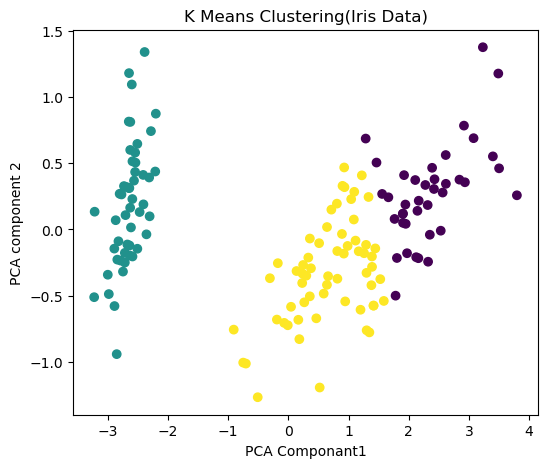

In [26]:
pca =  PCA(n_components = 2)
pca_data = pca.fit_transform(df)

plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap = 'viridis')
plt.title("K Means Clustering(Iris Data)")
plt.xlabel("PCA Componant1")
plt.ylabel("PCA component 2")
plt.show()

In [29]:
# Hierarchical Clustering

In [ ]:
# Hierarchical clustering is an unsupervised learning algorithm that builds a hierarchy of clusters either from the bottom up (agglomerative) or from the top down (divisive). In agglomerative clustering, which is more commonly used, each data point starts as its own cluster, and pairs of clusters are merged step-by-step based on similarity (usually using distance metrics like Euclidean distance) until all points are grouped into a single cluster. This process is often visualized using a dendrogram, which shows the order and distance at which clusters are merged.

# The Iris dataset is suitable for hierarchical clustering because it contains clear structure in its features—sepal and petal measurements—which helps in identifying similarities and differences between samples. With only 150 data points and four numerical features, hierarchical clustering can efficiently reveal natural groupings among the three flower species. The dendrogram allows visual exploration of the cluster formation process, helping to determine the optimal number of clusters (e.g., three, matching the actual species). This method is especially useful when you want to understand how data points are grouped at different levels of similarity.

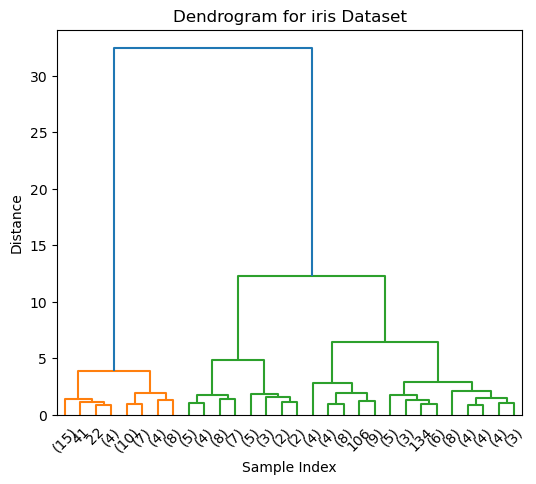

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linked = linkage(df, method = 'ward')

plt.figure(figsize =  (6,5))
dendrogram(linked, truncate_mode = 'lastp', p = 30)
plt.title("Dendrogram for iris Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3)
hc_labels = hc.fit_predict(df)

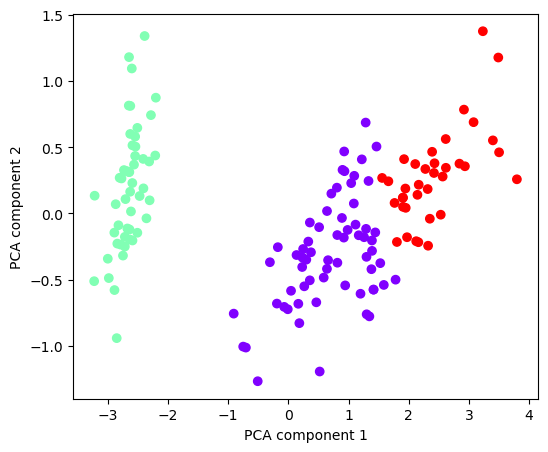

In [35]:
plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=hc_labels, cmap = 'rainbow')
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()